In [1]:
#Setting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
#Import dataframe
df = pd.read_csv (r'C:\Python3\Scripts\titanic-passengers.csv', delimiter = ';')

## Data Cleaning and Preprocessing

In [3]:
# find missing information
print('Is there missing data in the data frame:', df.isnull().values.any())

print('The columns that have missing data are:', df.columns[df.isnull().any()])        

#count number of missing values
print('The number of missing data is:', df.isnull().sum().sum())

Is there missing data in the data frame: True
The columns that have missing data are: Index(['Age', 'Cabin', 'Embarked'], dtype='object')
The number of missing data is: 866


In [4]:
# replace missing data by the right value
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna('Not Embarked', inplace=True)

#df.head(20)

In [5]:
# Removing irrelevant data:

df.drop(['Cabin'], axis='columns', inplace=True)
df.drop(['Embarked'], axis='columns', inplace=True)
df.drop(['PassengerId'], axis='columns', inplace=True)
df.drop(['Fare'], axis='columns', inplace=True)
df.drop(['Ticket'], axis='columns', inplace=True)

In [6]:
#Conversion of data:

#convert Survived: 0 = False ; 1 = True
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Survived'] = encoder.fit_transform (df['Survived'])

In [7]:
#convert Sex: 1 = Man ; 0 = Woman
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform (df['Sex'])

## Data Visualization

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


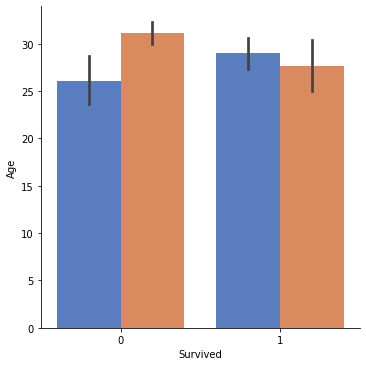

In [8]:
# Set up a factorplot to visualize correlation between Survival, Sex and Age
g = sns.factorplot("Survived", "Age", "Sex", data=df, kind="bar", palette="muted", legend=False)
g

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


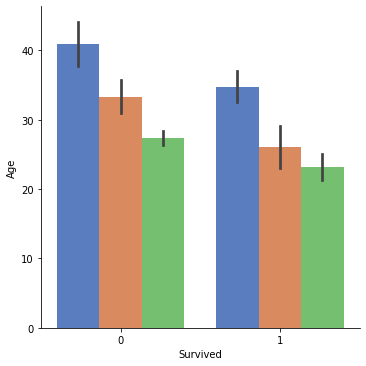

In [9]:
# factorplot to visualize correlation between Survival, Class and Age
h = sns.factorplot("Survived", "Age","Pclass", data=df, kind="bar", palette="muted", legend=False)
h

## Logistic Regression 

In [9]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0


In [10]:
#features extraction
x=df[["Age", "Pclass", "Sex", "SibSp", "Parch"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.75


<AxesSubplot:xlabel='Age', ylabel='Survived'>

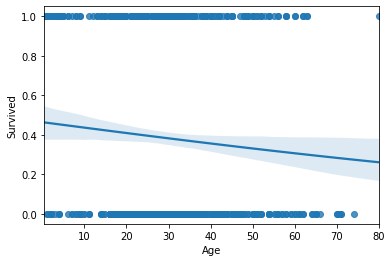

In [11]:
#Logistical regression visualization

sns.regplot(x='Age',y='Survived',data=df,logistic=True)

In [12]:
#importing of classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        84
           1       0.69      0.62      0.65        50

    accuracy                           0.75       134
   macro avg       0.74      0.73      0.73       134
weighted avg       0.75      0.75      0.75       134



In [13]:
# Using the ROC/AUC scoreon our predisctions:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7266666666666667